In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data/data_4.csv',index_col=[0],parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 1949-01-01 to 2017-01-01
Data columns (total 18 columns):
total-renewable-consumption                              69 non-null float64
total-renewable-production                               69 non-null float64
Hydroelectric-power                                      69 non-null float64
Hydroelectric-power-Con-Pro                              69 non-null float64
Geothermal_Energy_Consumption_per_Production             69 non-null float64
Geothermal_Energy_Consumption_by_the_Electric_Power      69 non-null float64
Solar_per_PV_Energy_Consumption_per_Production           69 non-null float64
Total_Biomass_Energy_Consumed_by_the_Electric_Power      69 non-null float64
Total_Biomass_Energy_Production                          69 non-null float64
Total_Renewable_Energy_Consumed_by_the_Electric_Power    69 non-null float64
Waste_Consumption_for_Electricity                        69 non-null float64
Wind_Energy_Consumed_by_the_El

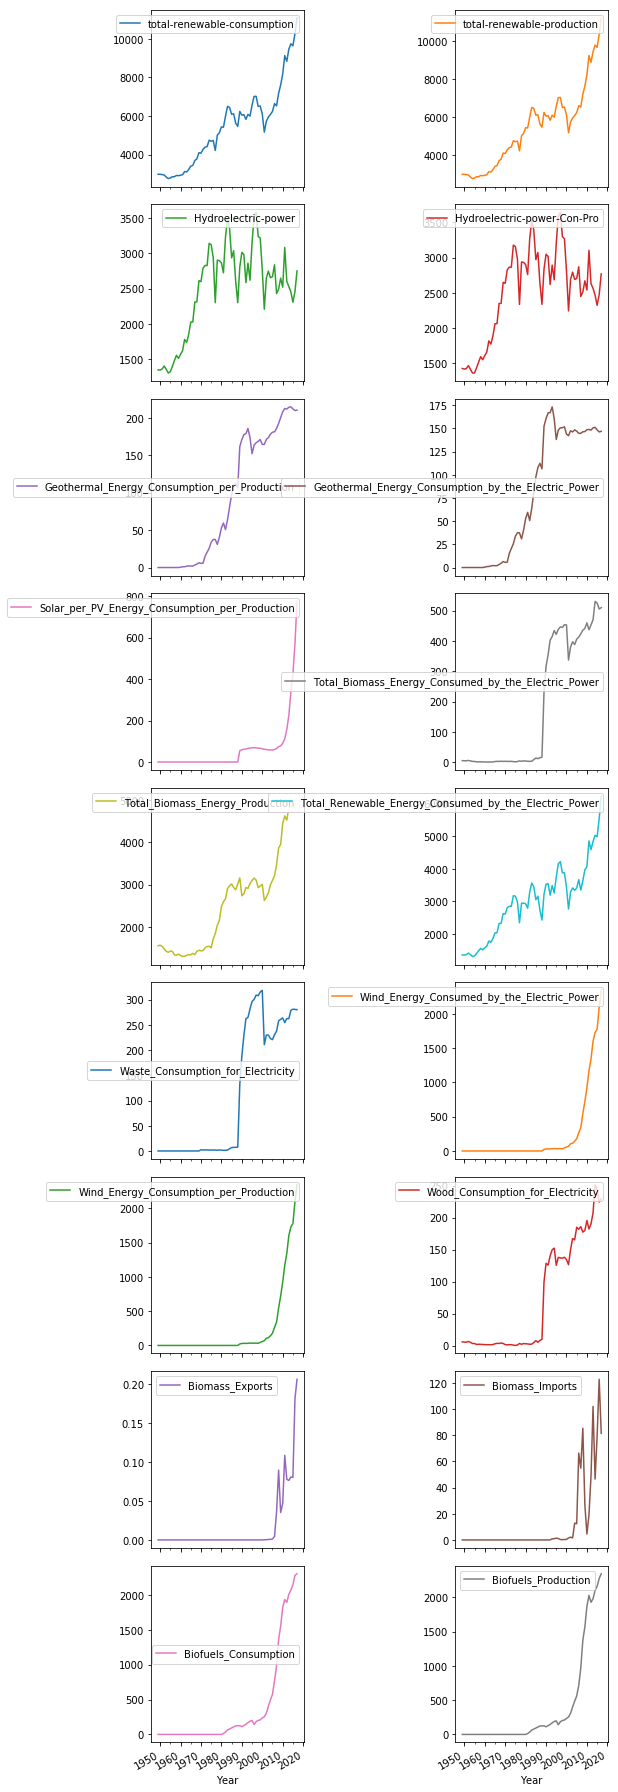

In [3]:
df.plot(subplots=True,figsize=(8,25),layout=(9,2))
plt.tight_layout()
plt.show()

**Data includes primary energy consumption (Y variable) and other 17 features (X)**

In [4]:
df.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Solar_per_PV_Energy_Consumption_per_Production,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Biomass_Energy_Production,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wind_Energy_Consumed_by_the_Electric_Power,Wind_Energy_Consumption_per_Production,Wood_Consumption_for_Electricity,Biomass_Exports,Biomass_Imports,Biofuels_Consumption,Biofuels_Production
Year,,,,,,,,,,,,,,,,,,
1949-01-01,2973.984,2973.984,1349.185,1424.722,0.0,0.0,0.0,5.803,1549.262,1354.988,0.0,0.0,0.0,5.803,0.0,0.0,0.0,0.0
1950-01-01,2977.718,2977.718,1346.015,1415.411,0.0,0.0,0.0,5.466,1562.307,1351.481,0.0,0.0,0.0,5.466,0.0,0.0,0.0,0.0
1951-01-01,2958.464,2958.464,1360.698,1423.795,0.0,0.0,0.0,5.331,1534.669,1366.029,0.0,0.0,0.0,5.331,0.0,0.0,0.0,0.0
1952-01-01,2940.181,2940.181,1404.274,1465.812,0.0,0.0,0.0,6.435,1474.369,1410.709,0.0,0.0,0.0,6.435,0.0,0.0,0.0,0.0
1953-01-01,2831.460,2831.460,1356.353,1412.859,0.0,0.0,0.0,5.019,1418.601,1361.372,0.0,0.0,0.0,5.019,0.0,0.0,0.0,0.0


In [5]:
features = pd.DataFrame(df.columns)

## Pearson correlation coefficient

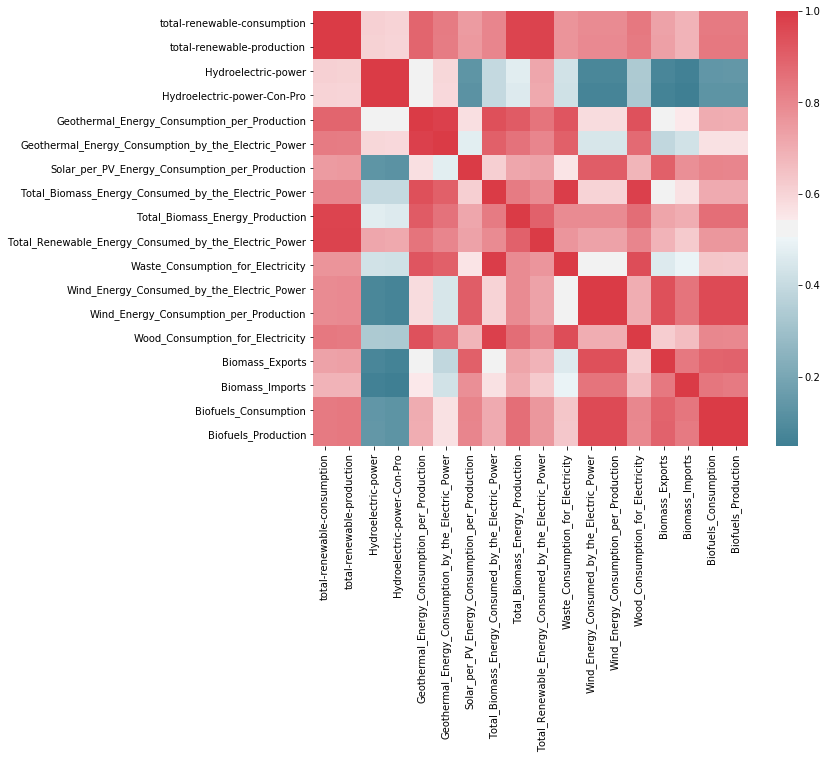

In [6]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

In [7]:
corr

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Solar_per_PV_Energy_Consumption_per_Production,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Biomass_Energy_Production,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wind_Energy_Consumed_by_the_Electric_Power,Wind_Energy_Consumption_per_Production,Wood_Consumption_for_Electricity,Biomass_Exports,Biomass_Imports,Biofuels_Consumption,Biofuels_Production
total-renewable-consumption,1.000000,0.999956,0.611687,0.603898,0.886472,0.831061,0.749790,0.805709,0.972416,0.974322,0.768998,0.789836,0.789793,0.837242,0.731243,0.687622,0.835966,0.834878
total-renewable-production,0.999956,1.000000,0.608909,0.601075,0.884802,0.828665,0.753126,0.804568,0.972287,0.974208,0.767656,0.792989,0.792947,0.836440,0.735951,0.687713,0.838158,0.837216
Hydroelectric-power,0.611687,0.608909,1.000000,0.999785,0.532105,0.593845,0.133064,0.397661,0.471503,0.717868,0.428585,0.080922,0.080893,0.338428,0.077529,0.058948,0.141464,0.141535
Hydroelectric-power-Con-Pro,0.603898,0.601075,0.999785,1.000000,0.527040,0.590687,0.124700,0.394499,0.463679,0.710966,0.427159,0.069758,0.069729,0.332714,0.066545,0.048581,0.129826,0.129881
Geothermal_Energy_Consumption_per_Production,0.886472,0.884802,0.532105,0.527040,1.000000,0.983009,0.574005,0.942744,0.914179,0.848676,0.926497,0.583548,0.583462,0.938904,0.516424,0.548602,0.704584,0.701962
Geothermal_Energy_Consumption_by_the_Electric_Power,0.831061,0.828665,0.593845,0.590687,0.983009,1.000000,0.475857,0.903329,0.854447,0.803441,0.902390,0.445600,0.445523,0.877342,0.387284,0.428418,0.568391,0.565553
Solar_per_PV_Energy_Consumption_per_Production,0.749790,0.753126,0.133064,0.124700,0.574005,0.475857,1.000000,0.614777,0.720823,0.729057,0.557998,0.909930,0.910005,0.682711,0.901411,0.777315,0.807264,0.805268
Total_Biomass_Energy_Consumed_by_the_Electric_Power,0.805709,0.804568,0.397661,0.394499,0.942744,0.903329,0.614777,1.000000,0.830537,0.790534,0.992143,0.602532,0.602455,0.981628,0.531318,0.568346,0.710006,0.707011
Total_Biomass_Energy_Production,0.972416,0.972287,0.471503,0.463679,0.914179,0.854447,0.720823,0.830537,1.000000,0.899143,0.788827,0.791158,0.791093,0.868938,0.722513,0.699747,0.864591,0.863429
Total_Renewable_Energy_Consumed_by_the_Electric_Power,0.974322,0.974208,0.717868,0.710966,0.848676,0.803441,0.729057,0.790534,0.899143,1.000000,0.765369,0.730871,0.730842,0.804916,0.684400,0.628320,0.761709,0.760717


## Stationary test

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):           
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [9]:
features = df.columns
for i,j in enumerate(features):
    print(str(i) + '. Series of ' + j)
    test_stationarity(df[j])
    print('')

0. Series of total-renewable-consumption
Results of Dickey-Fuller Test:
Test Statistic                  1.656303
p-value                         0.998017
#Lags Used                      0.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64

1. Series of total-renewable-production
Results of Dickey-Fuller Test:
Test Statistic                  1.719891
p-value                         0.998176
#Lags Used                      0.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64

2. Series of Hydroelectric-power
Results of Dickey-Fuller Test:
Test Statistic                 -2.224156
p-value                         0.197595
#Lags Used                      0.000000
Number of Observations Used    68.000000
Critical Value (1%)    

All features are non-stationary **except featerure df['Biomass_Exports']**


In [10]:
# make a differencing
df_diff = df.diff().dropna()
df_diff.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Solar_per_PV_Energy_Consumption_per_Production,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Biomass_Energy_Production,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wind_Energy_Consumed_by_the_Electric_Power,Wind_Energy_Consumption_per_Production,Wood_Consumption_for_Electricity,Biomass_Exports,Biomass_Imports,Biofuels_Consumption,Biofuels_Production
Year,,,,,,,,,,,,,,,,,,
1950-01-01,3.734,3.734,-3.170,-9.311,0.0,0.0,0.0,-0.337,13.045,-3.507,0.0,0.0,0.0,-0.337,0.0,0.0,0.0,0.0
1951-01-01,-19.254,-19.254,14.683,8.384,0.0,0.0,0.0,-0.135,-27.638,14.548,0.0,0.0,0.0,-0.135,0.0,0.0,0.0,0.0
1952-01-01,-18.283,-18.283,43.576,42.017,0.0,0.0,0.0,1.104,-60.300,44.680,0.0,0.0,0.0,1.104,0.0,0.0,0.0,0.0
1953-01-01,-108.721,-108.721,-47.921,-52.953,0.0,0.0,0.0,-1.416,-55.768,-49.337,0.0,0.0,0.0,-1.416,0.0,0.0,0.0,0.0
1954-01-01,-77.361,-77.361,-52.259,-53.087,0.0,0.0,0.0,-1.810,-24.274,-54.069,0.0,0.0,0.0,-1.810,0.0,0.0,0.0,0.0


In [11]:
for i,j in enumerate(features):
    print(str(i) + '. Series of ' + j)
    test_stationarity(df_diff[j])
    print('')

0. Series of total-renewable-consumption
Results of Dickey-Fuller Test:
Test Statistic                -7.625935e+00
p-value                        2.068751e-11
#Lags Used                     0.000000e+00
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64

1. Series of total-renewable-production
Results of Dickey-Fuller Test:
Test Statistic                -7.541930e+00
p-value                        3.360352e-11
#Lags Used                     0.000000e+00
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64

2. Series of Hydroelectric-power
Results of Dickey-Fuller Test:
Test Statistic                -9.083638e+00
p-value                        3.994033e-15
#Lags Used                     0.000000e+00
Number of Obs

Some features are not stationary after differencing

### Make other transformations for non-stationary time series

In [12]:
test_stationarity(df[df['Solar_per_PV_Energy_Consumption_per_Production']!=0].loc[:,'Solar_per_PV_Energy_Consumption_per_Production']
                  .apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                -7.601990e+00
p-value                        2.375881e-11
#Lags Used                     4.000000e+00
Number of Observations Used    2.900000e+01
Critical Value (1%)           -3.679060e+00
Critical Value (5%)           -2.967882e+00
Critical Value (10%)          -2.623158e+00
dtype: float64


In [13]:
test_stationarity(df['Total_Biomass_Energy_Production'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.550041
p-value                         0.881876
#Lags Used                     11.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [14]:
test_stationarity(df['Total_Biomass_Energy_Production'].apply(np.sqrt).apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.550041
p-value                         0.881876
#Lags Used                     11.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [15]:
test_stationarity(df['Total_Biomass_Energy_Production'].apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.070729
p-value                         0.952277
#Lags Used                     11.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [16]:
test_stationarity(df['Total_Biomass_Energy_Production'].apply(np.log).diff(7).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.982847
p-value                         0.036528
#Lags Used                     11.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [17]:
test_stationarity(df[df['Wind_Energy_Consumed_by_the_Electric_Power']!=0].loc[:,'Wind_Energy_Consumed_by_the_Electric_Power']
                  .apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.790329
p-value                         0.821946
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [18]:
test_stationarity(df[df['Wind_Energy_Consumed_by_the_Electric_Power']!=0].loc[:,'Wind_Energy_Consumed_by_the_Electric_Power']
                  .apply(np.log).diff(4).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.397429e+01
p-value                        4.289509e-26
#Lags Used                     5.000000e+00
Number of Observations Used    2.500000e+01
Critical Value (1%)           -3.723863e+00
Critical Value (5%)           -2.986489e+00
Critical Value (10%)          -2.632800e+00
dtype: float64


In [19]:
test_stationarity(df[df['Wind_Energy_Consumption_per_Production']!=0].loc[:,'Wind_Energy_Consumption_per_Production'].
                 apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.790026
p-value                         0.822034
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [20]:
test_stationarity(df[df['Wind_Energy_Consumption_per_Production']!=0].loc[:,'Wind_Energy_Consumption_per_Production'].
                 apply(np.log).diff(4).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.397541e+01
p-value                        4.270639e-26
#Lags Used                     5.000000e+00
Number of Observations Used    2.500000e+01
Critical Value (1%)           -3.723863e+00
Critical Value (5%)           -2.986489e+00
Critical Value (10%)          -2.632800e+00
dtype: float64


In [21]:
test_stationarity(df[df['Biomass_Imports']!=0].loc[:,'Biomass_Imports'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.943937
p-value                         0.773159
#Lags Used                      0.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [22]:
test_stationarity(df[df['Biomass_Imports']!=0].loc[:,'Biomass_Imports'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.975859
p-value                         0.001542
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [23]:
test_stationarity(df[df['Biofuels_Consumption']!=0].loc[:,'Biofuels_Consumption'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -5.823651e+00
p-value                        4.127169e-07
#Lags Used                     0.000000e+00
Number of Observations Used    3.500000e+01
Critical Value (1%)           -3.632743e+00
Critical Value (5%)           -2.948510e+00
Critical Value (10%)          -2.613017e+00
dtype: float64


All features could be transformed into stationary series